In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
# initializing notebook and the cufflinks offline mode
init_notebook_mode(connected=True) 

In [3]:
df = pd.read_csv('/Users/briankimanzi/Documents/world_population.csv',index_col='Rank')

In [4]:
# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

In [5]:
df.sort_values('Rank', inplace=True)

In [6]:
# rounds of the floating numbers from scientific notation to 2 decimal place
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df

,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,,,,,,,,,,,,,,,,
1,CHN,China,Beijing,Asia,1425887337.00,1424929781.00,1393715448.00,1348191368.00,1264099069.00,1153704252.00,982372466.00,822534450.00,9706961.00,146.89,1.00,17.88
2,IND,India,New Delhi,Asia,1417173173.00,1396387127.00,1322866505.00,1240613620.00,1059633675.00,NaN,NaN,557501301.00,3287590.00,431.07,1.01,17.77
3,USA,United States,"Washington, D.C.",North America,338289857.00,335942003.00,324607776.00,311182845.00,282398554.00,248083732.00,223140018.00,200328340.00,9372610.00,36.09,1.00,4.24
4,IDN,Indonesia,Jakarta,Asia,275501339.00,271857970.00,259091970.00,244016173.00,214072421.00,182159874.00,148177096.00,115228394.00,1904569.00,144.65,1.01,3.45
5,PAK,Pakistan,Islamabad,Asia,235824862.00,227196741.00,210969298.00,194454498.00,154369924.00,115414069.00,80624057.00,59290872.00,881912.00,267.40,1.02,2.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,MSR,Montserrat,Brades,North America,4390.00,4500.00,5059.00,4938.00,5138.00,10805.00,11452.00,11402.00,102.00,43.04,0.99,0.00
231,FLK,Falkland Islands,Stanley,South America,3780.00,3747.00,3408.00,3187.00,3080.00,2332.00,2240.00,2274.00,12173.00,0.31,1.00,0.00
232,NIU,Niue,Alofi,Oceania,1934.00,1942.00,1847.00,1812.00,2074.00,2533.00,3637.00,5185.00,260.00,7.44,1.00,0.00


In [7]:
rows , columns = df.shape
print(f"Rows = {rows} columns = {columns}")

Rows = 234 columns = 16


In [8]:
df.columns

Index(['CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

In [8]:
df.dtypes

CCA3                            object
Country                         object
Capital                         object
Continent                       object
2022 Population                float64
2020 Population                float64
2015 Population                float64
2010 Population                float64
2000 Population                float64
1990 Population                float64
1980 Population                float64
1970 Population                float64
Area (km²)                     float64
Density (per km²)              float64
Growth Rate                    float64
World Population Percentage    float64
dtype: object

In [9]:
# df['Capital']
def cleaning_Capital():
    """This function removes special 
        characters on the Capital column"""
    return  df['Capital'].str.replace(r'a-zA-Z0-9', '', regex=True)

In [10]:
df.isnull().sum()

CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                4
2020 Population                1
2015 Population                4
2010 Population                7
2000 Population                7
1990 Population                5
1980 Population                5
1970 Population                4
Area (km²)                     2
Density (per km²)              4
Growth Rate                    2
World Population Percentage    0
dtype: int64

In [11]:
# filling the NA with 0 value 
df['Density (per km²)']= df['Density (per km²)'].fillna(0).astype(float)

In [12]:
# created the column ranking to test rounding function
df['ranking'] = df['Area (km²)']
# dropped the column ranking
df.drop(['ranking'], axis = 'columns', inplace=True)

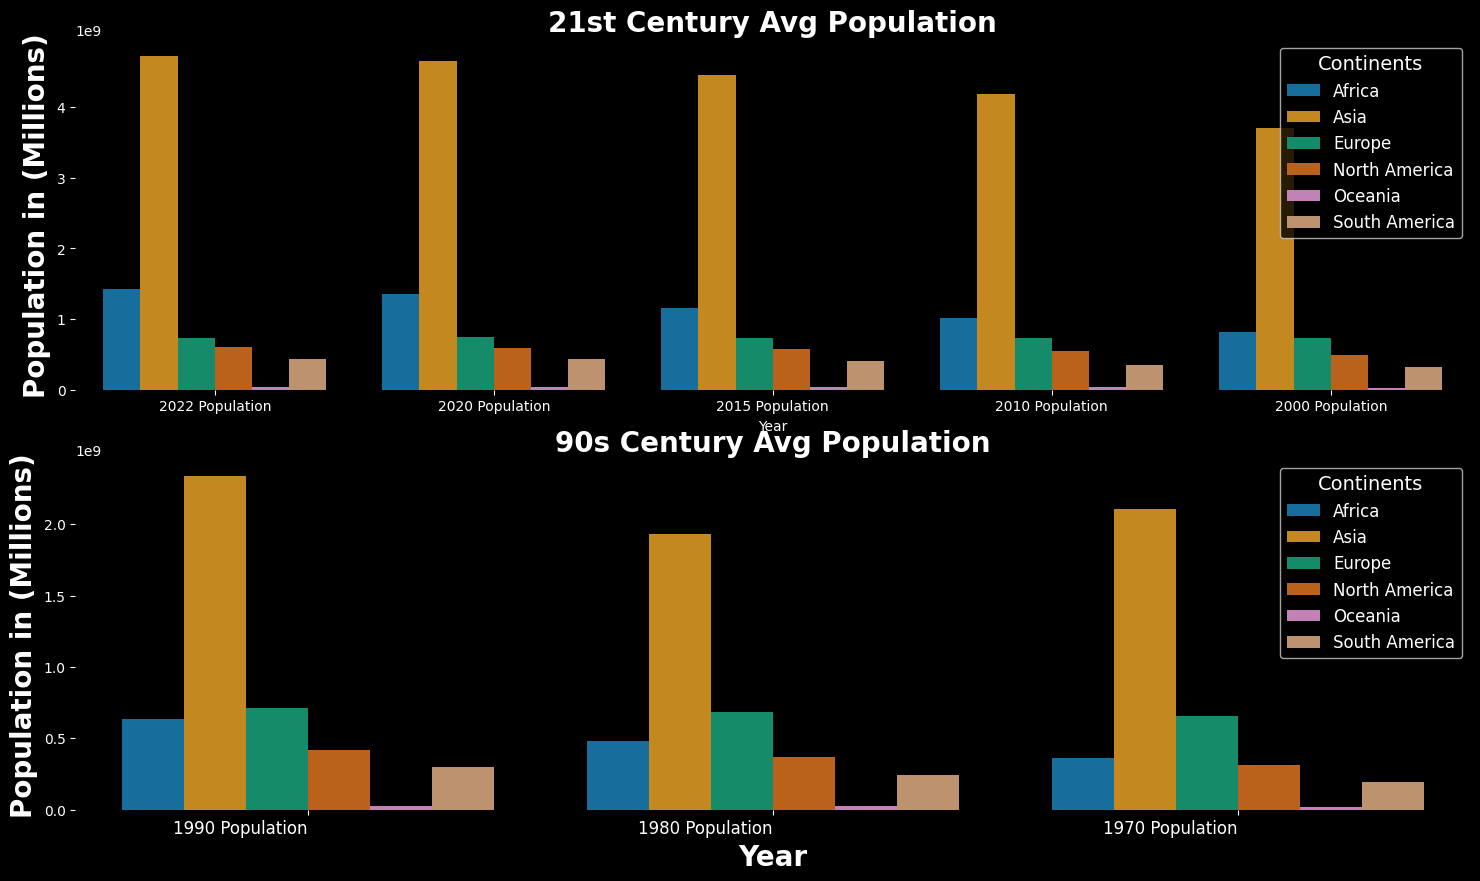

In [13]:
plt.style.use('dark_background')

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 10))

def century_21(ax1):
    df1 = df.copy()
    df1 = pd.DataFrame(df1.groupby(["Continent"])[["2022 Population",
       "2020 Population", "2015 Population", "2010 Population",
       "2000 Population"]].sum())
# reshape data for side by side view 21st century
    df_melted = df1.reset_index().melt(id_vars="Continent",
                                  var_name="Year",
                                  value_name="Population")
    
    ax1=sns.barplot(data=df_melted, x="Year", y="Population", hue="Continent",
                    palette="colorblind", dodge=0.8, ax=ax1)
    
    ax1.set_ylabel("log")
    ax1.set_title("21st Century Avg Population", fontsize=20, fontweight="bold")
    ax1.set_ylabel("Population in (Millions)", fontsize=20, fontweight="bold")
    ax1.legend(title="Continents", fontsize=12, title_fontsize=14, loc="upper right")



def century_90s(ax2):
    
    df2 = df.copy()
    df2 = pd.DataFrame(df2.groupby(["Continent"])[['1990 Population', 
                                               '1980 Population',
                                               '1970 Population']].sum())
# reshape data for side by side view 90s century
    df_melted = df2.reset_index().melt(id_vars="Continent",
                                  var_name="Year",
                                  value_name="Population")
    
    ax2=sns.barplot(data=df_melted, x="Year", y="Population", hue="Continent",
                    palette="colorblind", dodge=0.8, ax=ax2)
    
    ax2.set_ylabel("log")
    ax2.set_title("90s Century Avg Population", fontsize=20, fontweight="bold")
    ax2.set_xlabel("Year", fontsize=20, fontweight="bold")
    ax2.legend(title="Continents", fontsize=12, title_fontsize=14, loc="upper right")


# run the functions
century_21(ax1)
century_90s(ax2)
plt.ylabel("Population in (Millions)", fontsize=20, fontweight="bold")


plt.xticks(rotation=0, ha="right", fontsize=12)
sns.despine(left=True, bottom=True)
plt.show()

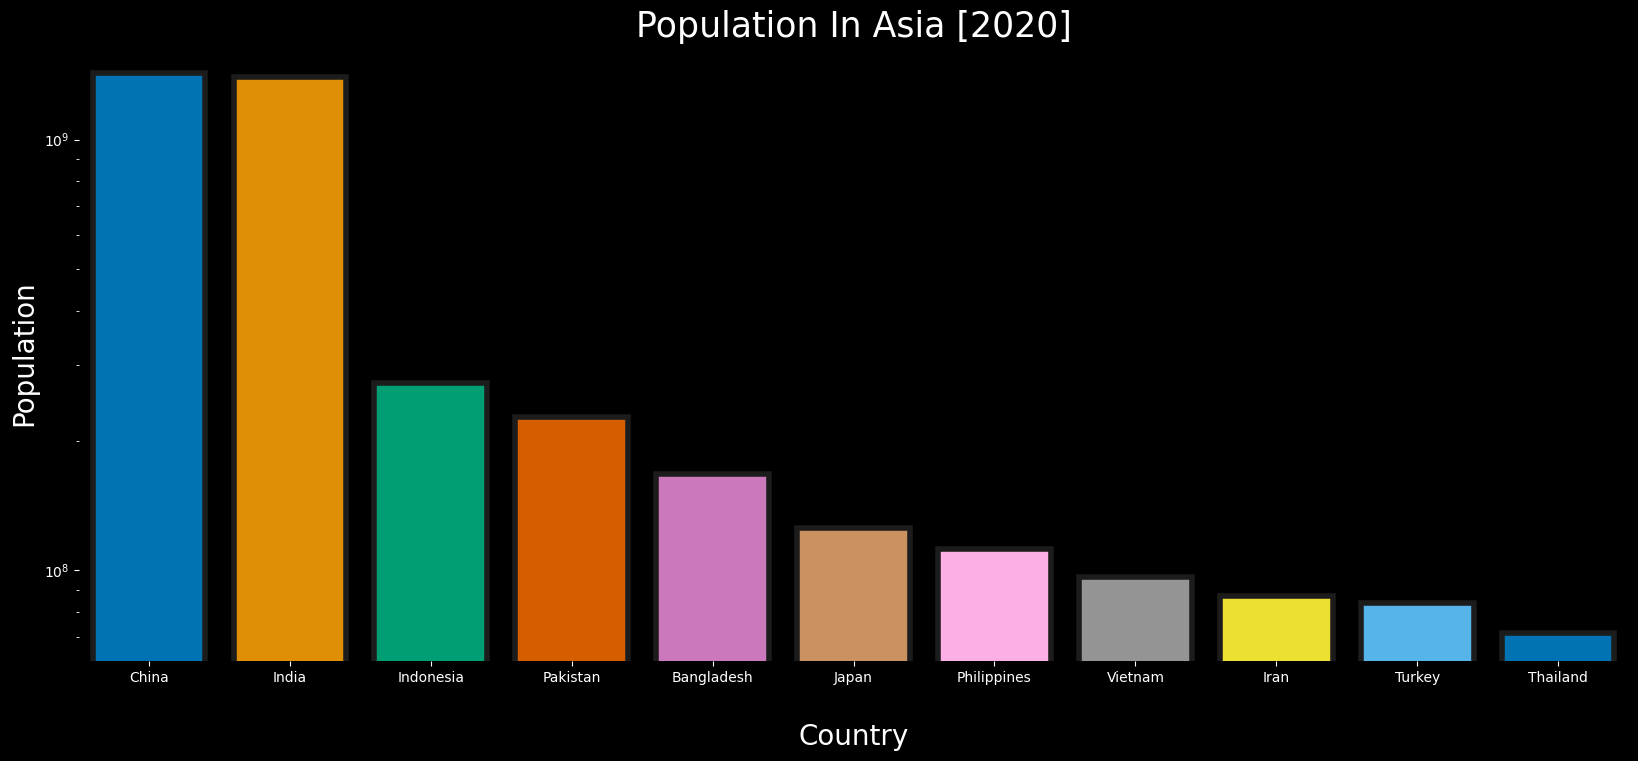

In [14]:
# Highest country in asia
plt.subplots(figsize=(20,8))
sorted_values = df[df["Continent"]=="Asia"].sort_values("2020 Population", ascending=False)["Country"][:11]
p = sns.barplot(data=df[df["Continent"] == "Asia"], x ="Country", y="2020 Population", 
                order= sorted_values, hue="Country", palette = "colorblind", saturation=1, edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Population In Asia [2020]",fontsize=25)
p.set_xlabel("\nCountry",fontsize=20)
p.set_ylabel("Population",fontsize=20)
    

sns.despine(left=True, bottom=True)
plt.show()

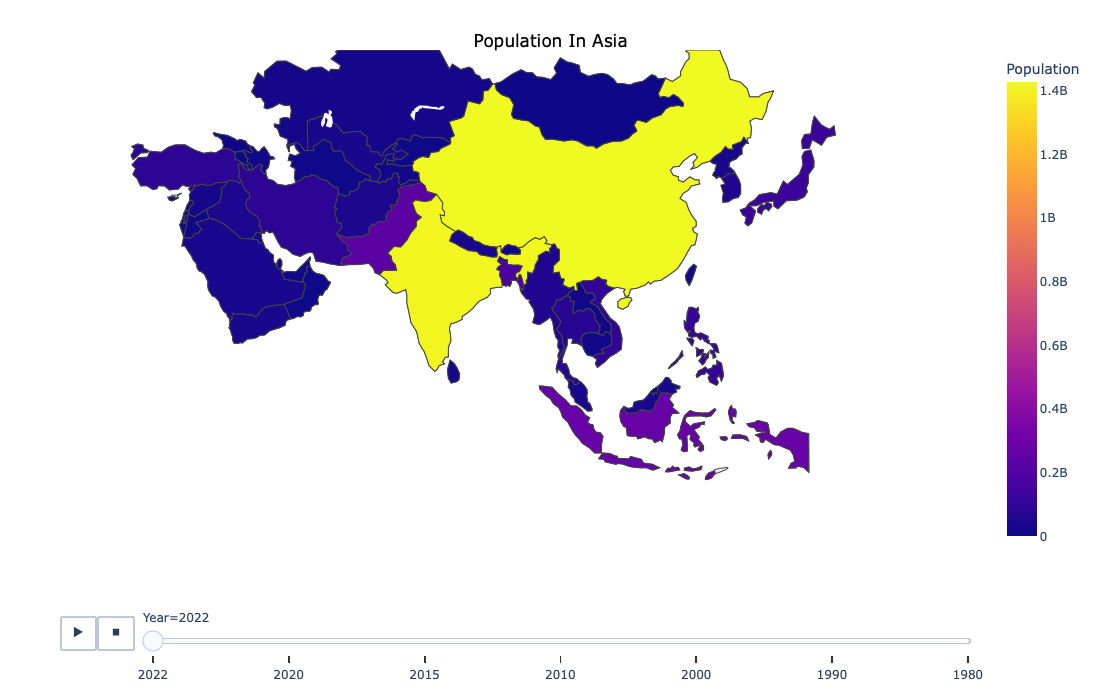

In [17]:
# mapping the Asian continent
df_copy = df.copy()

df_melt = df_copy.melt(id_vars =['Country'],
                      value_vars = df_copy.columns[4:11],
                      var_name='Year',
                      value_name = 'Population')
df_melt['Year'] = df_melt['Year'].str.extract(r"(\d+)").astype(int)

fig = px.choropleth(data_frame = df_melt, locations="Country",locationmode="country names", 
                    color="Population",height=700, scope="asia",animation_frame = 'Year',
                    animation_group = 'Country',
                   labels={"2020 population": "Population"})

fig.update_layout(title=dict(text = "Population In Asia \n", 
                            y = 0.95, x=0.5, xanchor="center", yanchor="top", font_color = "black"), 
                  margin=dict(l=50, r=50, b=50, t=50),
                  # geo_bgcolor="#D5CE98",
                  # paper_bgcolor="#D5CE98"
                 )
fig.show()

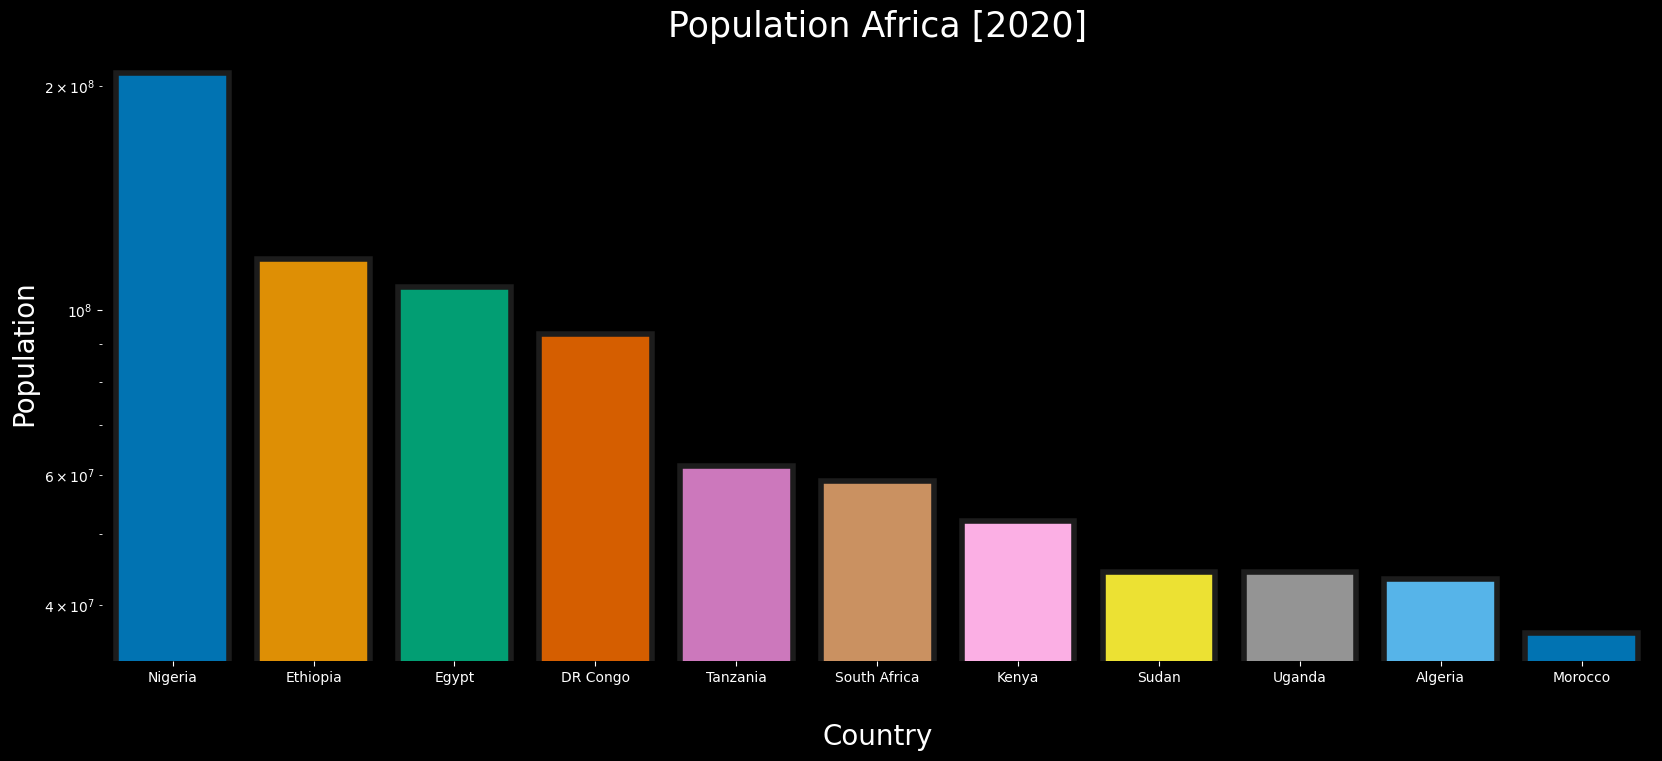

In [16]:
# Population 2020 for Africa
plt.subplots(figsize=(20, 8))
sorted_values2 = df[df['Continent'] == "Africa"].sort_values("2020 Population", ascending=False)["Country"][:11]
p = sns.barplot(data=df[df["Continent"]=="Africa"], x = "Country", y = "2020 Population",
               order = sorted_values2, hue="Country", palette = "colorblind", saturation=1, edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Population Africa [2020]", fontsize=25)
p.set_xlabel("\nCountry",fontsize=20)
p.set_ylabel("Population",fontsize=20)


sns.despine(left=True, bottom=True)
plt.show()

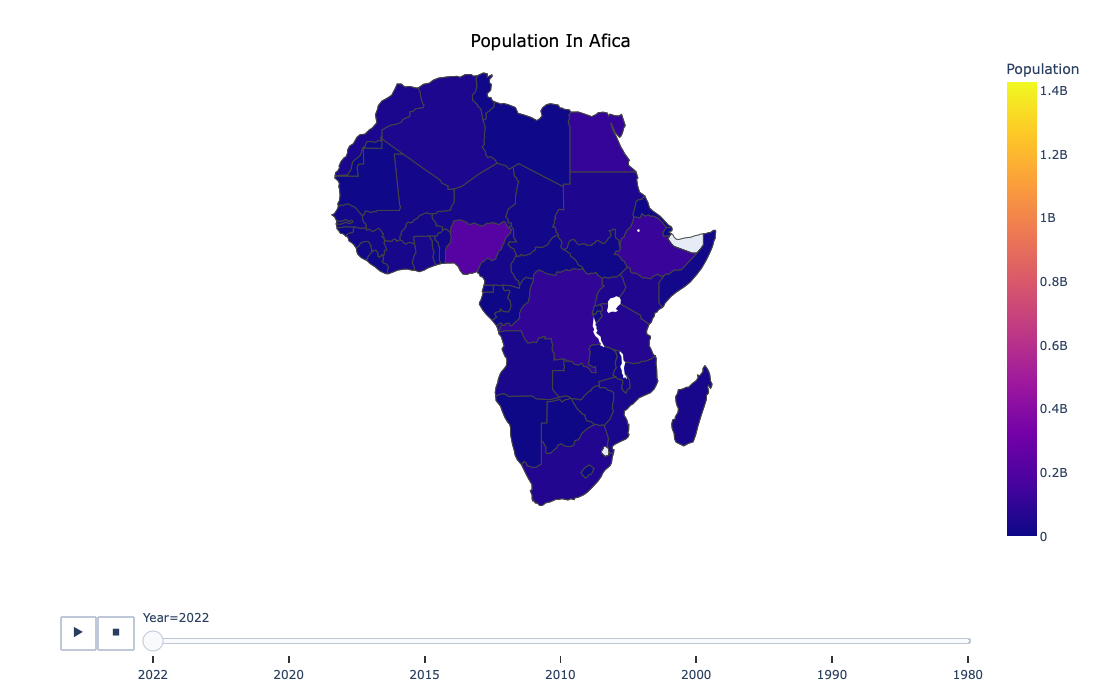

In [18]:
# Africa map population in 2020
fig = px.choropleth(data_frame = df_melt, locations="Country", locationmode="country names",
                    color="Population", height=700, scope="africa", animation_frame='Year',
                    animation_group='Country',
                   labels={"2020 Population : Population"})

fig.update_layout(title=dict(text = "Population In Afica \n", 
                            y = 0.95, x=0.5, xanchor="center", yanchor="top", font_color = "black"), 
                  margin=dict(l=50, r=50, b=50, t=50),
                  # geo_bgcolor = "#D5CE98",
                  # paper_bgcolor="#D5CE98"
                 )


fig.show()

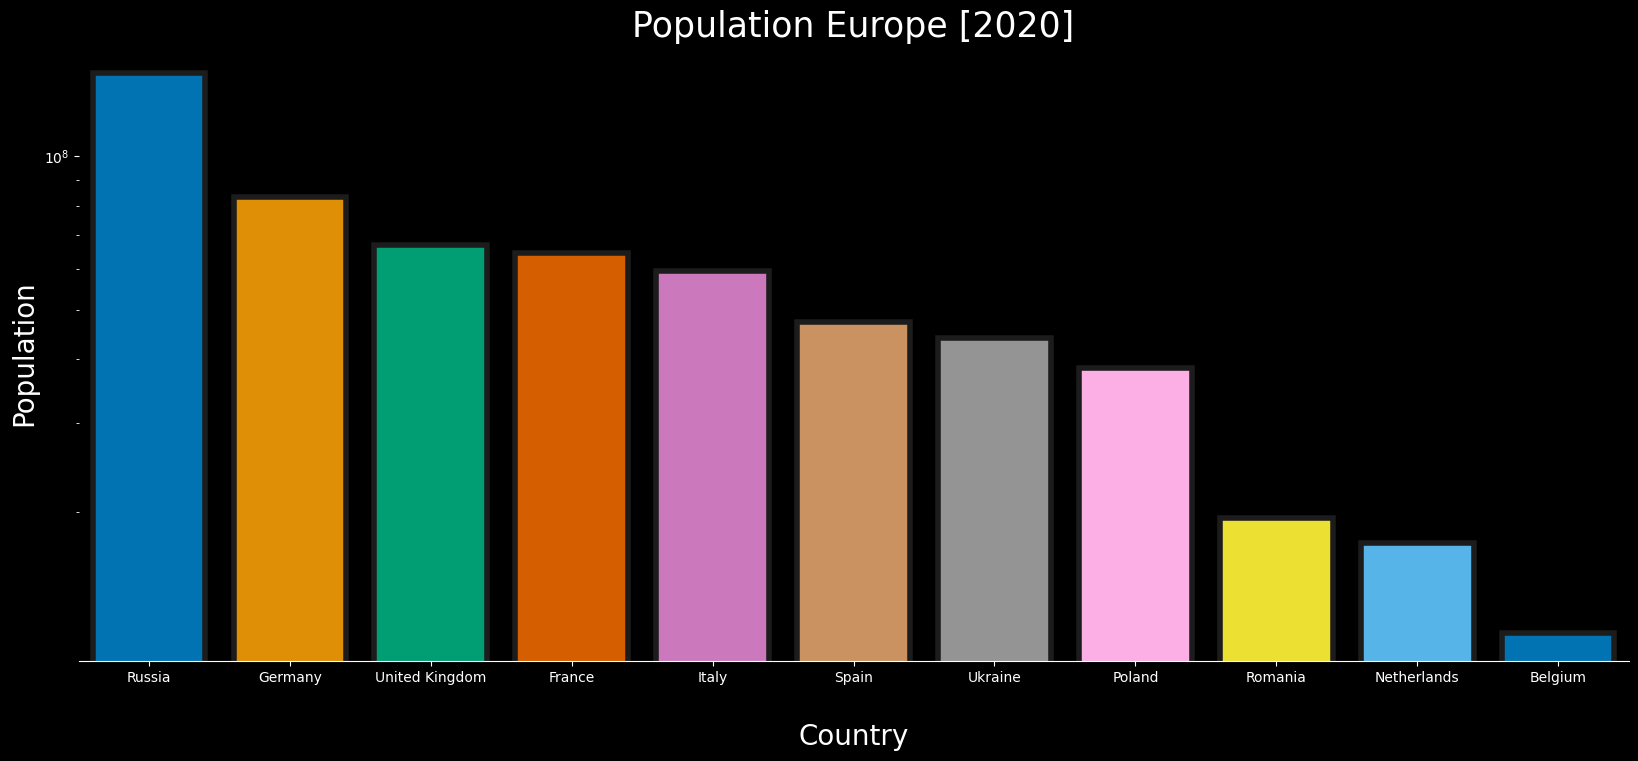

In [18]:
# population of Europe during 2020
plt.subplots(figsize=(20, 8))
sorted_values3 = df[df['Continent']=="Europe"].sort_values("2020 Population", ascending=False)['Country'][:11]
p = sns.barplot(data=df[df["Continent"] == "Europe"], x="Country", y="2020 Population", order=sorted_values3, hue="Country",
               palette="colorblind",saturation=1, edgecolor = "#1c1c1c", linewidth = 4)

p.set_yscale("log")
p.set_title("Population Europe [2020]", fontsize=25)
p.set_xlabel("\nCountry",fontsize=20)
p.set_ylabel("Population",fontsize=20)

sns.despine(left=True, right=True)
plt.show()

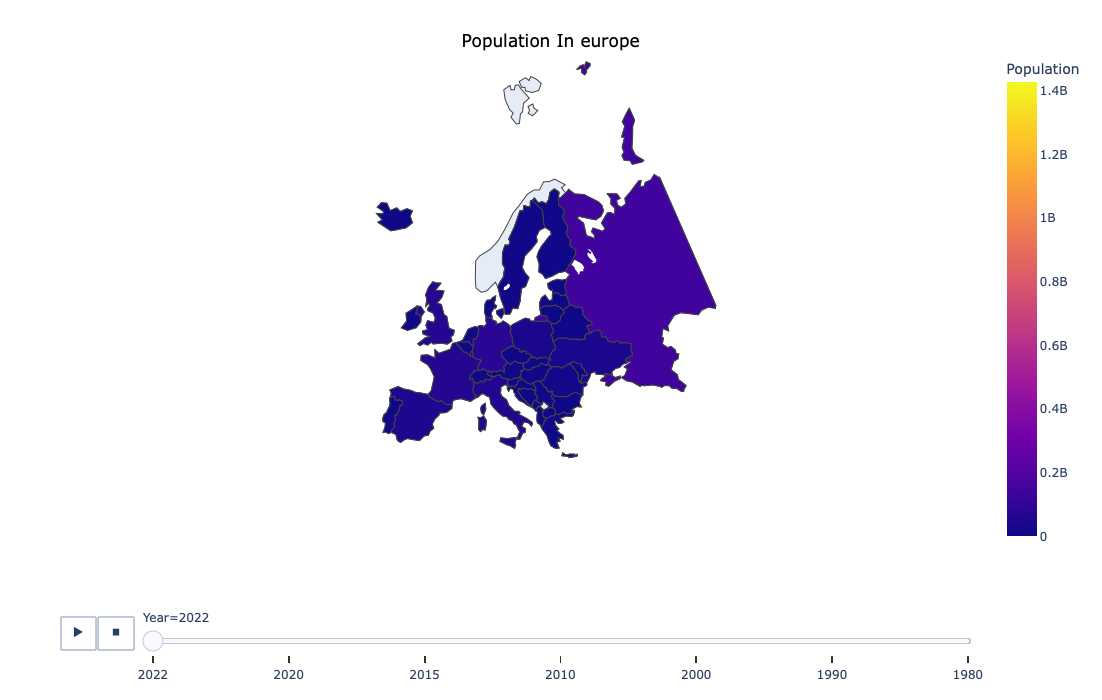

In [19]:
# Europe map population in 2020
fig = px.choropleth(data_frame = df_melt, locations="Country", locationmode="country names",
                    color="Population", height=700, scope="europe", animation_frame = 'Year',
                    animation_group='Country',
                   labels={"2020 Population : Population"})

fig.update_layout(title=dict(text = "Population In europe \n", 
                            y = 0.95, x=0.5, xanchor="center", yanchor="top", font_color = "black"), 
                  margin=dict(l=50, r=50, b=50, t=50),
                  # geo_bgcolor = "#D5CE98",
                  # paper_bgcolor="#D5CE98"
                 )


fig.show()

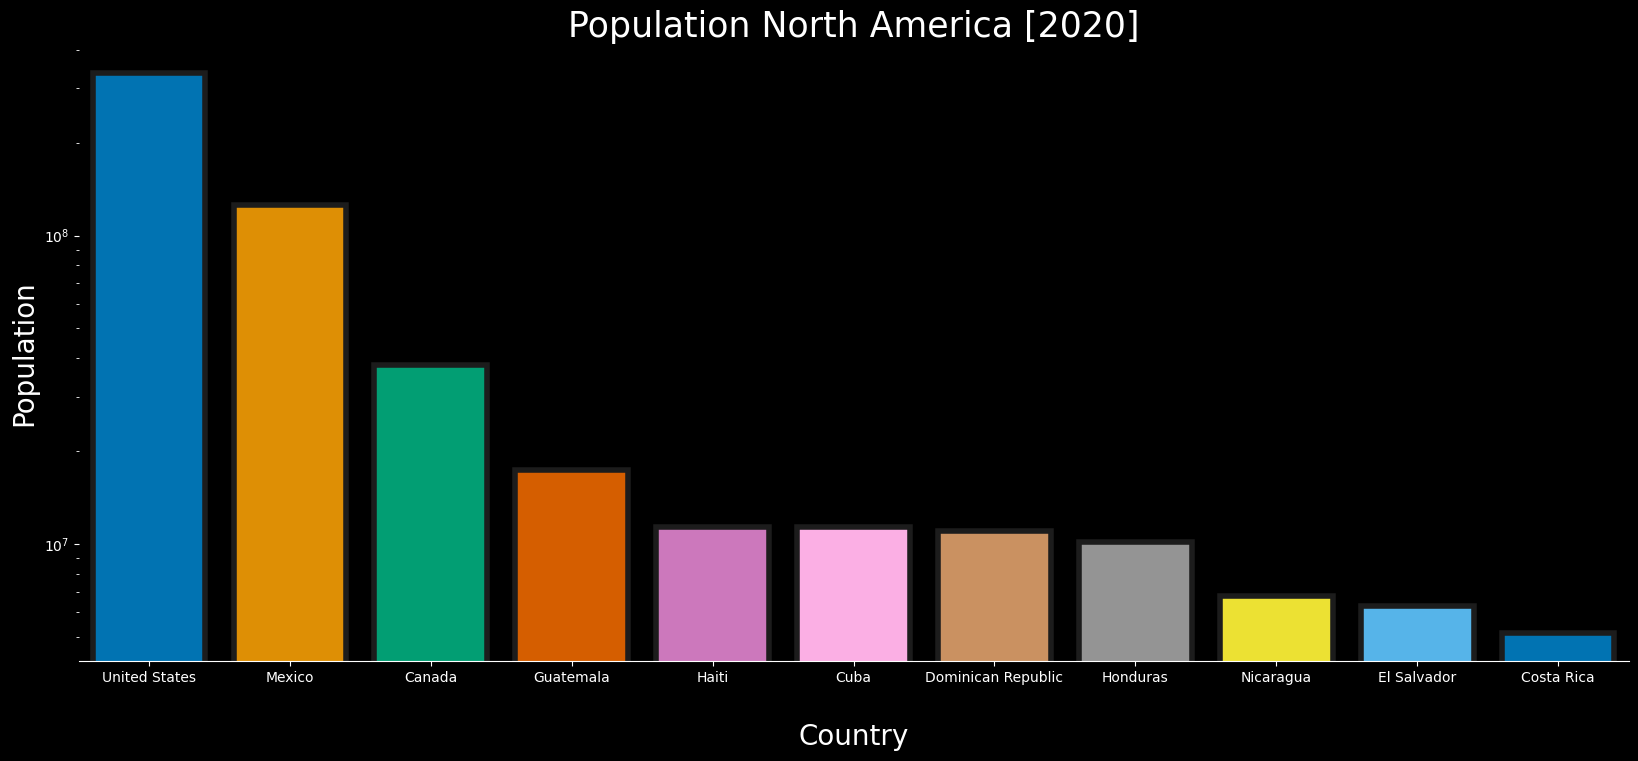

In [20]:
plt.subplots(figsize=(20, 8))
sorted_values4 = df[df["Continent"] == "North America"].sort_values("2020 Population", ascending=False)["Country"][:11]
p = sns.barplot(data=df[df["Continent"]=="North America"], x="Country", y= "2020 Population", hue="Country", palette="colorblind",
                order=sorted_values4, saturation=1, edgecolor = "#1c1c1c", linewidth = 4)


p.set_yscale("log")
p.set_title("Population North America [2020]", fontsize=25)
p.set_xlabel("\nCountry",fontsize=20)
p.set_ylabel("Population",fontsize=20)

sns.despine(left=True, right=True)
plt.show()

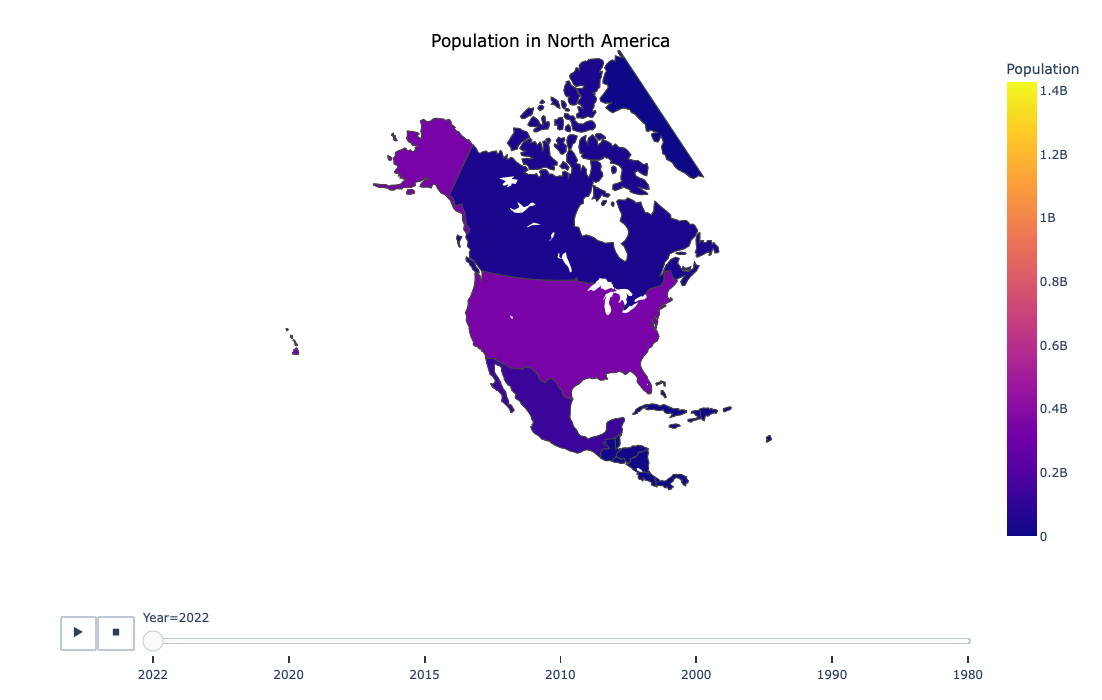

In [20]:
# mapping the north America continent
fig = px.choropleth(data_frame = df_melt, locations="Country", locationmode = "country names",
                   color="Population", height=700, scope="north america", animation_frame = 'Year',
                    animation_group='Country',
                   labels={"2020 Population : Population"})
fig.update_layout(title=dict(text="Population in North America \n",
                            y=0.95, x = 0.5, yanchor="top", xanchor="center", font_color = "black"),
                            margin=dict(l=50, r=50, b=50, t=50))
fig.show()

In [22]:
# checking the correlation of the data
heat = df[df.columns[4:16]].corr()

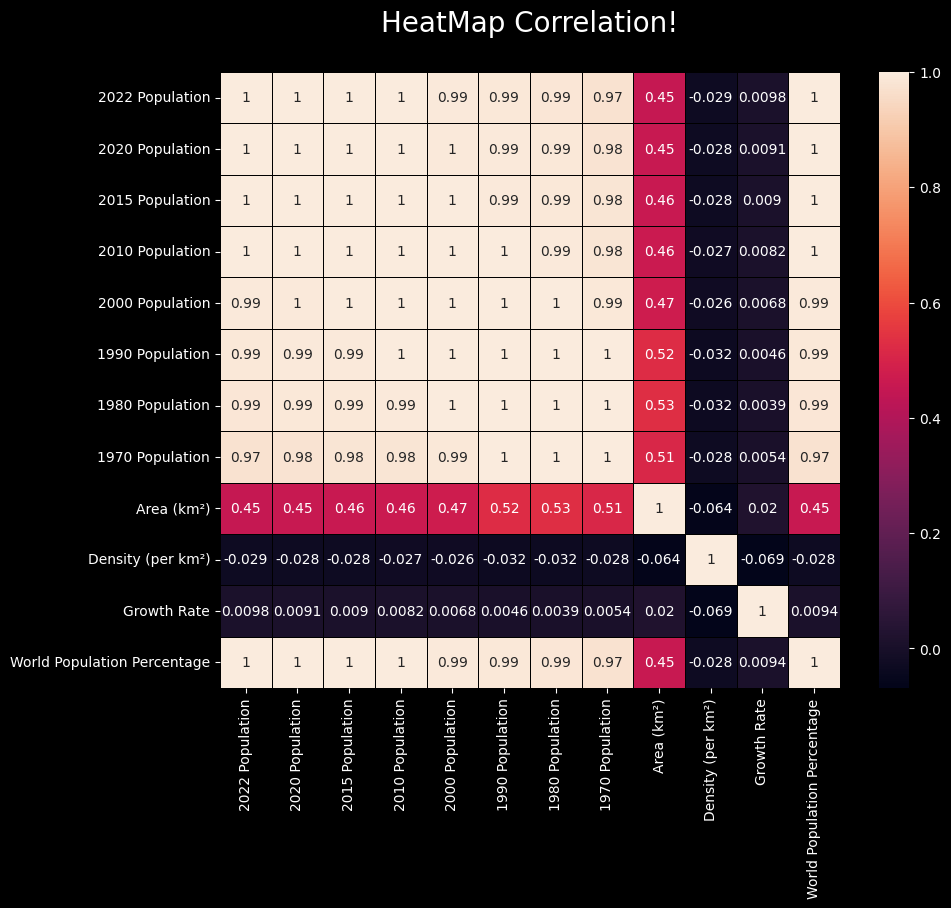

In [23]:
# heat map for the correlation
plt.subplots(figsize=(10, 8))
sns.heatmap(heat, annot=True, linewidths=.5, linecolor='black', cbar=True, xticklabels='auto', yticklabels='auto')
plt.title("HeatMap Correlation!\n", fontsize=20)
plt.show()

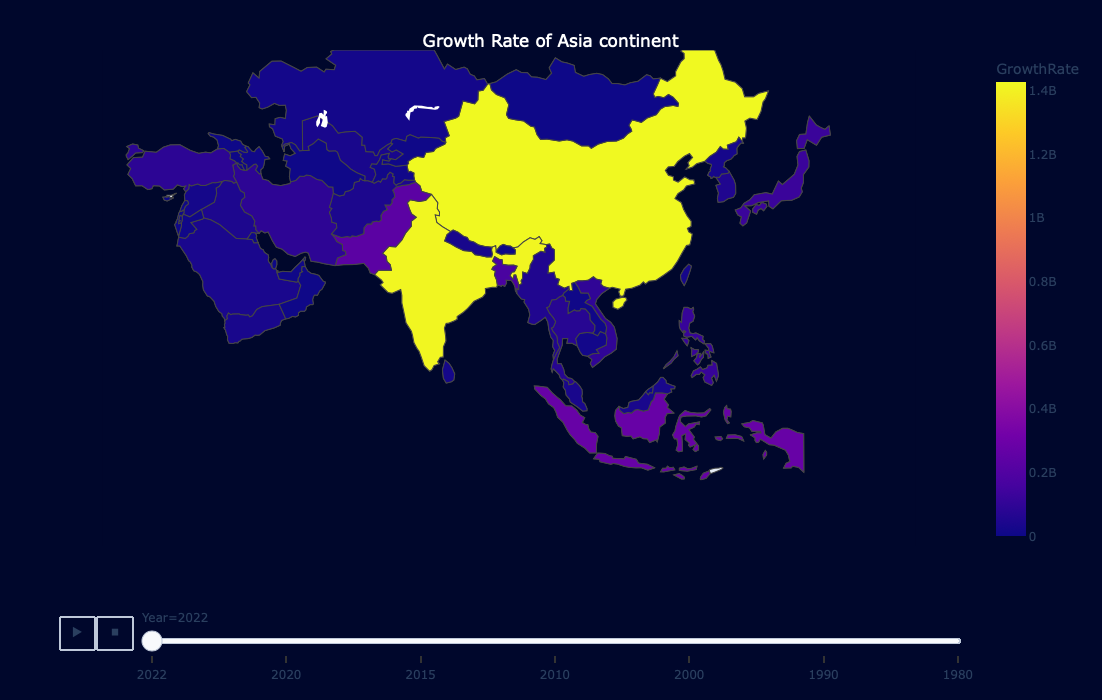

In [21]:
# growth rate fot the continents
df_melting = df_copy.melt(id_vars=['Country'],
                          value_vars= df_copy.columns[4:11],
                          var_name='Year',
                          value_name='GrowthRate'
                    )
df_melting['Year'] = df_melting['Year'].str.extract(r"(\d+)").astype(int)

fig = px.choropleth(data_frame=df_melting, locations="Country", locationmode = "country names", 
                   color="GrowthRate", height=700, scope = "asia", animation_frame = 'Year',
                    animation_group='Country',
                   labels={"Growth Rate : Growth Rate"})
fig.update_layout(title=dict(text="Growth Rate of Asia continent \n", 
                             y=0.95, x=0.5, yanchor="top", xanchor="center", font_color="white"),
                 margin=dict(l=50,r=50,b=50,t=50),
                 geo_bgcolor = "#00072C",
                  paper_bgcolor="#00072C"
                 )
fig.show()

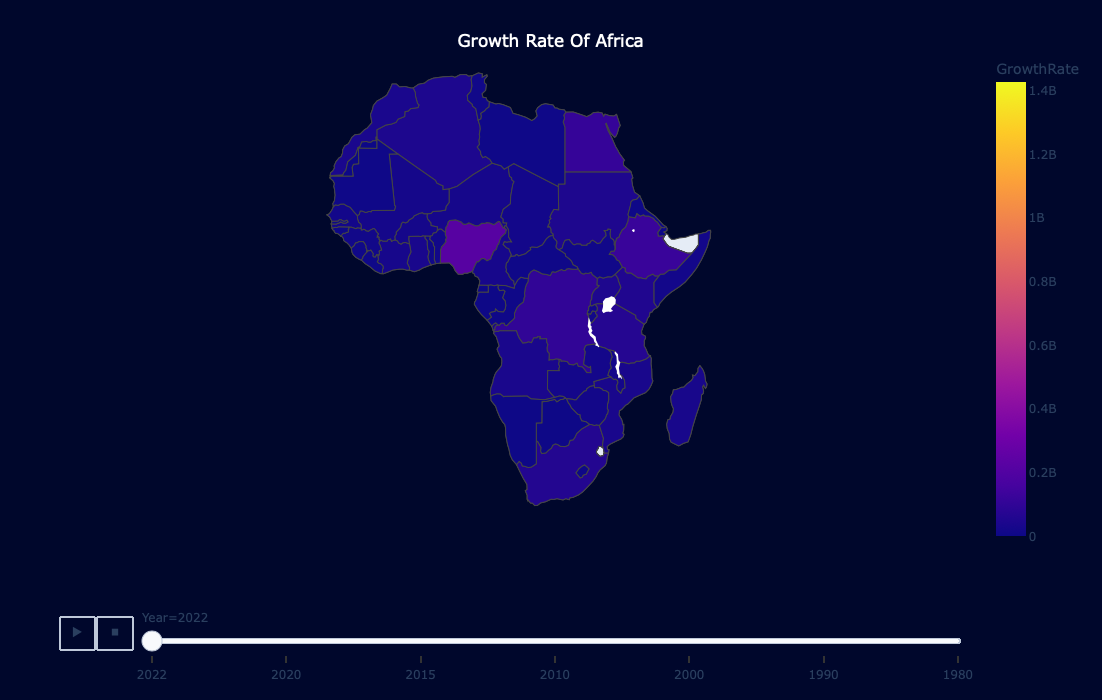

In [22]:
# growth rate of Africa continent
fig = px.choropleth(data_frame = df_melting, locations="Country", locationmode="country names",
                   color="GrowthRate", height=700, scope="africa",animation_frame= 'Year',
                    animation_group = 'Country',
                   labels={"Growth Rate : Growth Rate"})
fig.update_layout(title=dict(text="Growth Rate Of Africa \n",
                             y=0.95,x=0.5, yanchor="top", xanchor="center", font_color="white"),
                 margin=dict(l=50,r=50,b=50,t=50),
                   geo_bgcolor = "#00072C",
                  paper_bgcolor="#00072C"
                 )
fig.show()

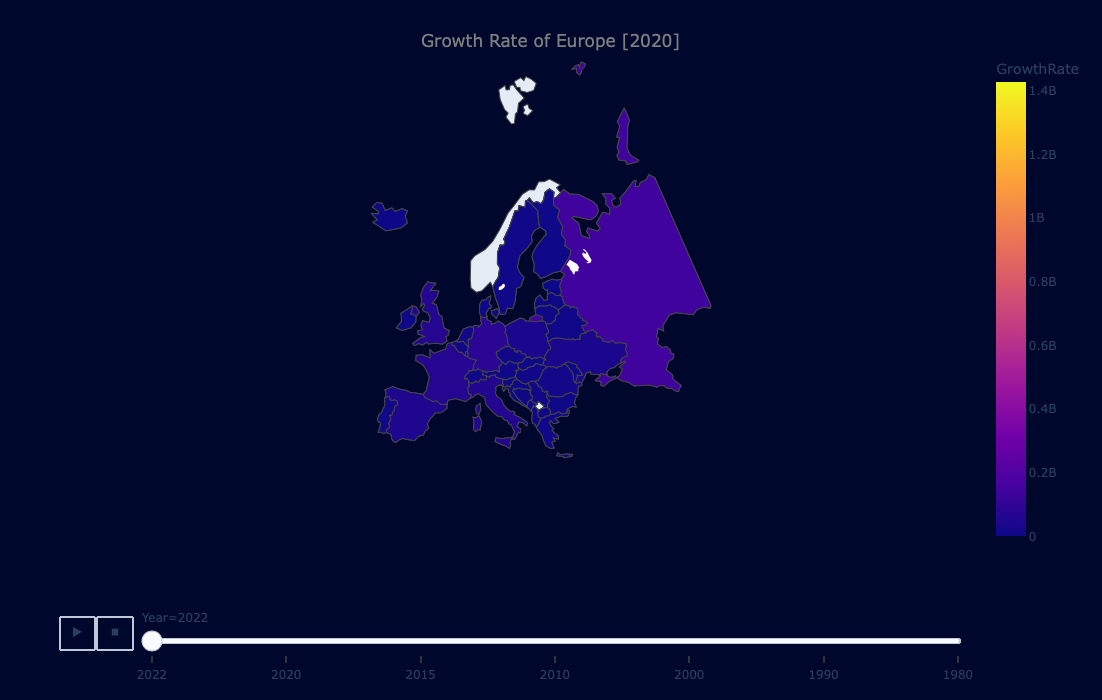

In [23]:
# growth rate of europe continent
fig = px.choropleth(data_frame= df_melting, locations="Country", locationmode="country names",
                   color="GrowthRate", height=700, scope="europe", animation_frame = 'Year',
                    animation_group = 'Country',
                    labels={"Growth Rate : Growth Rate"})
fig.update_layout(title=dict(text="Growth Rate of Europe [2020]\n",
                            y=0.95, x=0.5, xanchor="center", yanchor="top", font_color="grey"),
                 margin=dict(l=50,r=50,b=50,t=50),
                   geo_bgcolor = "#00072C",
                  paper_bgcolor="#00072C"
                 )
fig.show()

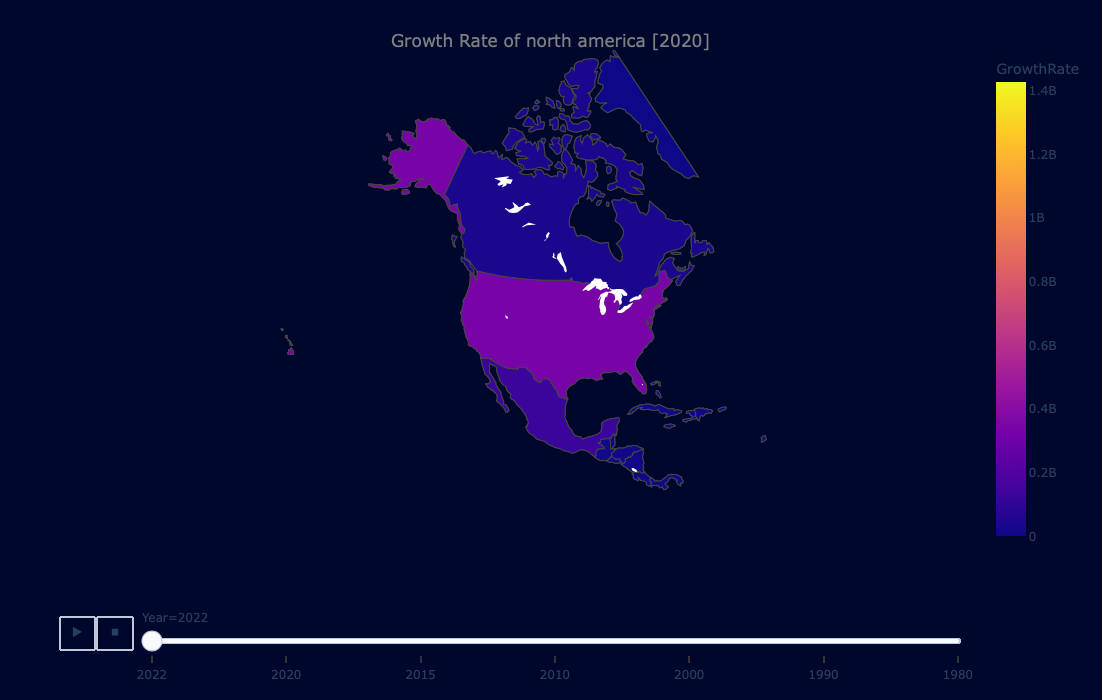

In [24]:
# North America continent Growth Rate in 2020
fig = px.choropleth(data_frame = df_melting, locations="Country", locationmode="country names", animation_frame = 'Year',
                    animation_group = 'Country',
                   color="GrowthRate", height=700, scope="north america")
fig.update_layout(title=dict(text="Growth Rate of north america [2020]\n",
                            y=0.95, x=0.5, yanchor="top", xanchor="center",  font_color="grey"),
                 margin=dict(l=50,r=50,b=50,t=50),
                  geo_bgcolor = "#00072C",
                  paper_bgcolor="#00072C"
                 )
fig.show()

In [28]:
df['Continent'].unique()

array(['Asia', 'North America', 'Africa', 'South America', 'Europe',
       'Oceania'], dtype=object)

In [29]:
df.groupby(['Continent'])[df.columns[12:]].agg(['mean', 'sum']).sort_values(by=[('World Population Percentage','sum'),
                                                                           ('World Population Percentage', 'mean')],ascending=False)

Area (km²)             Density (per km²)          Growth Rate  \
                    mean         sum              mean      sum        mean   
Continent                                                                     
Asia           642762.82 32138141.00           1025.02 51251.21        1.01   
Africa         537879.30 30121241.00            126.41  6952.36        1.00   
Europe         460208.22 23010411.00            663.32 33166.24        1.00   
North America  606104.45 24244178.00            272.49 10354.78        0.98   
South America 1301302.85 16916937.00             20.97   293.61        1.01   
Oceania        370220.91  8515081.00            132.54  3048.49        1.01   

                    World Population Percentage        
                sum                        mean   sum  
Continent                                              
Asia          50.47                        1.18 59.19  
Africa        57.19                        0.31 17.87  
Europe        50.11                        0.19  9.33  
North America 39.17                        0.19  7.51  
South America 14.11                        0.39  5.48  
Oceania       23.17                        0.02  0.55

In [30]:
columns_to_group = list(df.columns[4:9]) + ['World Population Percentage']
df.groupby(['Continent'])[columns_to_group].agg(['mean', 'sum']).sort_values(by=[('World Population Percentage','sum'),
                                                                           ('World Population Percentage', 'mean')],ascending=False)

2022 Population               2020 Population                \
                         mean           sum            mean           sum   
Continent                                                                   
Asia              96327387.31 4720041978.00     94955134.37 4652801584.00   
Africa            25455879.68 1425529262.00     23871435.26 1360671810.00   
Europe            15055371.82  737713219.00     14915843.92  745792196.00   
North America     15007403.40  600296136.00     14855914.82  594236593.00   
South America     31201186.29  436816608.00     30823574.50  431530043.00   
Oceania            2046386.32   45020499.00      1910148.96   43933426.00   

              2015 Population               2010 Population                \
                         mean           sum            mean           sum   
Continent                                                                   
Asia              89165003.64 4458250182.00     89087770.00 4187125190.00   
Africa            21419703.57 1156663993.00     18898197.31 1020502655.00   
Europe            15027454.12  736345252.00     14712278.68  735613934.00   
North America     14259596.25  570383850.00     13568016.28  542720651.00   
South America     29509599.71  413134396.00     26789395.54  348262142.00   
Oceania            1756664.48   40403283.00      1613163.65   37102764.00   

              2000 Population               World Population Percentage        
                         mean           sum                        mean   sum  
Continent                                                                      
Asia              80580835.11 3706718415.00                        1.18 59.19  
Africa            14598365.95  817508493.00                        0.31 17.87  
Europe            14817685.71  726066600.00                        0.19  9.33  
North America     12151739.60  486069584.00                        0.19  7.51  
South America     25015888.69  325206553.00                        0.39  5.48  
Oceania            1357512.09   31222778.00                        0.02  0.55

In [31]:
columns_to_group = list(df.columns[9:12]) + ['World Population Percentage']
df.groupby(['Continent'])[columns_to_group].agg(['mean', 'sum']).sort_values(by=[('World Population Percentage','sum'),
                                                                           ('World Population Percentage', 'mean')],ascending=False)

1990 Population               1980 Population                \
                         mean           sum            mean           sum   
Continent                                                                   
Asia              48639995.33 2334719776.00     40278333.33 1933360000.00   
Africa            11376964.52  637110013.00      8586031.98  480817791.00   
Europe            14785203.94  709689789.00     14200004.52  681600217.00   
North America     10531660.62  421266425.00      9207334.03  368293361.00   
South America     21224743.93  297146415.00     17270643.29  241789006.00   
Oceania            1162774.87   26743822.00       996532.17   22920240.00   

              1970 Population               World Population Percentage        
                         mean           sum                        mean   sum  
Continent                                                                      
Asia              43839877.83 2104314136.00                        1.18 59.19  
Africa             6567175.27  361194640.00                        0.31 17.87  
Europe            13118479.82  655923991.00                        0.19  9.33  
North America      7885865.15  315434606.00                        0.19  7.51  
South America     13781939.71  192947156.00                        0.39  5.48  
Oceania             846968.26   19480270.00                        0.02  0.55

In [32]:
grouped = pd.DataFrame(df.groupby(['Continent'])['World Population Percentage'].sum().sort_values(ascending=False)).reset_index()

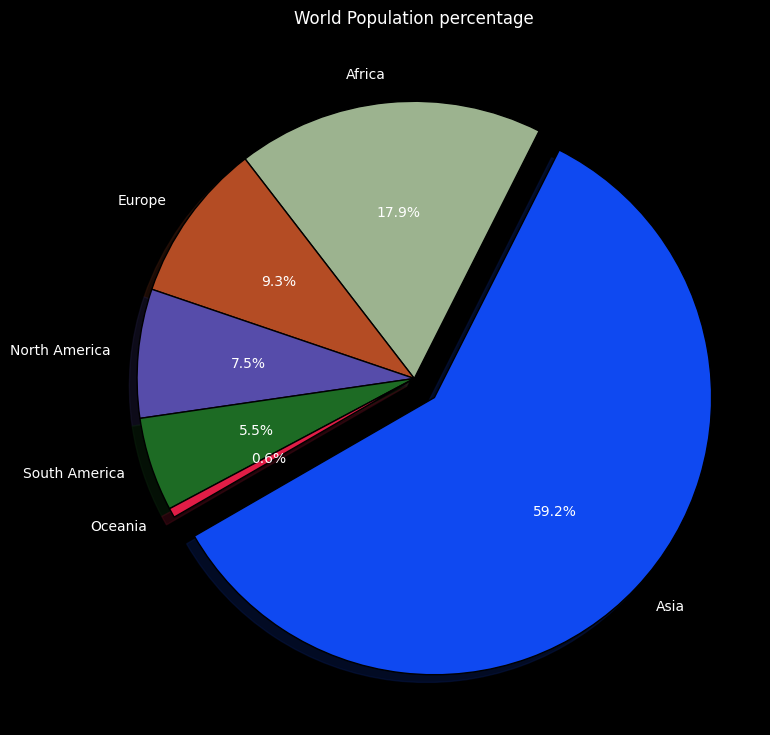

In [33]:
# display the continent and world population Percentage on a pie chart
plt.subplots(figsize=(20, 9))
population = grouped['World Population Percentage']
continent = grouped['Continent']

explode = [0.1, 0, 0, 0, 0, 0]

colors = ['#0f49f1', '#9cb38f', '#b44c24', '#564caa', '#1d6b24', '#e11d46', '#22b5a1']

plt.pie(population, labels=continent,explode=explode, 
        shadow=True, startangle=210, autopct='%1.1f%%', 
        colors=colors, wedgeprops={'edgecolor':'black'})

plt.title("World Population percentage")
plt.show()

In [34]:
# # !blockstart
# import random
# position = 0
# walk = [position]
# nsteps = 1000
# for _ in range(nsteps):
#     steps = 1 if random.randint(0 , 1) else -1
#     position += steps
#     walk.append (position)
# print(walk)
# plt.plot(walk[:100])

In [35]:
df[['Country', 'Growth Rate']]

,Country,Growth Rate
Rank,,
1,China,1.00
2,India,1.01
3,United States,1.00
4,Indonesia,1.01
5,Pakistan,1.02
...,...,...
230,Montserrat,0.99
231,Falkland Islands,1.00
232,Niue,1.00


In [36]:
continent_growth = df_melting.groupby('Year')['GrowthRate'].mean().reset_index()

fig = px.line(continent_growth, x='Year', y='GrowthRate',
             labels={'Year':'Year', 'GrowthRate':'GrowthRate'},
             title='Growth rate of Asia contient over the years')
fig.update_layout(
    title=dict(
        text="Growth Rate of Asia Continent Over the Years",
        y=0.95, x=0.5, yanchor="top", xanchor="center"
    ),
    xaxis_title="Year",
    yaxis_title="Growth Rate",
    paper_bgcolor="#00072C",
    plot_bgcolor="#00072C",
    font=dict(color="white")
)
fig.show()

In [37]:
continent_growth = df_melting.groupby('Year')['GrowthRate'].mean().reset_index()

fig = px.line(continent_growth, x='Year', y='GrowthRate',
             labels={'Year':'Year', 'GrowthRate':'GrowthRate'},
             title='Growth rate of Africa contient over the years')
fig.update_layout(
    title=dict(
        text="Growth Rate of Africa Continent Over the Years",
        y=0.95, x=0.5, yanchor="top", xanchor="center"
    ),
    xaxis_title="Year",
    yaxis_title="Growth Rate",
    paper_bgcolor="#00072C",
    plot_bgcolor="#00072C",
    font=dict(color="white")
)
fig.show()

In [38]:
continent_growth = df_melting.groupby('Year')['GrowthRate'].mean().reset_index()

fig = px.line(continent_growth, x='Year', y='GrowthRate',
             labels={'Year':'Year', 'GrowthRate':'GrowthRate'},
             title='Growth rate of Asia contient over the years')
fig.update_layout(
    title=dict(
        text="Growth Rate of Asia Continent Over the Years",
        y=0.95, x=0.5, yanchor="top", xanchor="center"
    ),
    xaxis_title="Year",
    yaxis_title="Growth Rate",
    paper_bgcolor="#00072C",
    plot_bgcolor="#00072C",
    font=dict(color="white")
)
fig.show()

In [39]:
df.groupby(['Continent'])[df.columns[4:16]].mean().sort_values(by='World Population Percentage', ascending=False)

,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,,,,,,,,,,,,
Asia,96327387.31,94955134.37,89165003.64,89087770.00,80580835.11,48639995.33,40278333.33,43839877.83,642762.82,1025.02,1.01,1.18
South America,31201186.29,30823574.50,29509599.71,26789395.54,25015888.69,21224743.93,17270643.29,13781939.71,1301302.85,20.97,1.01,0.39
Africa,25455879.68,23871435.26,21419703.57,18898197.31,14598365.95,11376964.52,8586031.98,6567175.27,537879.30,126.41,1.00,0.31
North America,15007403.40,14855914.82,14259596.25,13568016.28,12151739.60,10531660.62,9207334.03,7885865.15,606104.45,272.49,0.98,0.19
Europe,15055371.82,14915843.92,15027454.12,14712278.68,14817685.71,14785203.94,14200004.52,13118479.82,460208.22,663.32,1.00,0.19
Oceania,2046386.32,1910148.96,1756664.48,1613163.65,1357512.09,1162774.87,996532.17,846968.26,370220.91,132.54,1.01,0.02


In [40]:
df['Country']

Rank
1                 China
2                 India
3         United States
4             Indonesia
5              Pakistan
             ...       
230          Montserrat
231    Falkland Islands
232                Niue
233             Tokelau
234        Vatican City
Name: Country, Length: 234, dtype: object

In [41]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [70]:
df.to_csv('worldPopulationTableau.csv')